In [4]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.mobo import mobo
from botorch.test_functions.multi_objective import ZDT1

# test function
from xopt.evaluators import test_TNK
from xopt.evaluators import test_ZDT



In [5]:

# Get VOCS
VOCS = test_ZDT.VOCS

# add reference point
ref = torch.tensor((11., 11.))

print(VOCS)
# Get evaluate function
EVALUATE = test_ZDT.evaluate

# VOCS['variables']['x1'] = [0, 4]  # Extent to occasionally throw an exception

# Run
results = mobo(VOCS, EVALUATE, ref = ref, n_steps=20, verbose=False)
model = results['model']

    


{'vocs': {'name': 'ZDT1_test', 'description': 'ZDT1 unconstrained multi-objective test function', 'simulation': 'ZDT1_test', 'variables': {'x1': [0, 1.0], 'x2': [0, 1.0]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constraints': {}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}, 'xopt': {'verbose': False, 'output_path': ''}}
n_feas: 5


c:\users\ryan roussel\documents\github\xopt\xopt\mobo.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ref = torch.tensor(ref)


n_feas: 6
n_feas: 7
n_feas: 8
n_feas: 9
n_feas: 10
n_feas: 11
n_feas: 12
n_feas: 13
n_feas: 14
n_feas: 15
n_feas: 16
n_feas: 17
n_feas: 18
n_feas: 19
n_feas: 20
n_feas: 21
n_feas: 22
n_feas: 23
n_feas: 24


C:\Users\RYANRO~1\AppData\Local\Temp/ipykernel_24072/3829905010.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax2.pcolor(*xx, mean[1].reshape(n, n))
C:\Users\RYANRO~1\AppData\Local\Temp/ipykernel_24072/3829905010.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax2.pcolor(*xx, torch.sqrt(var[1].reshape(n, n)))


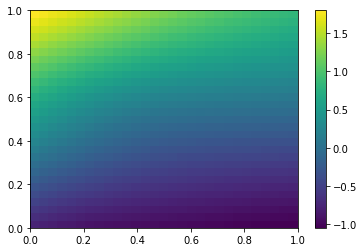

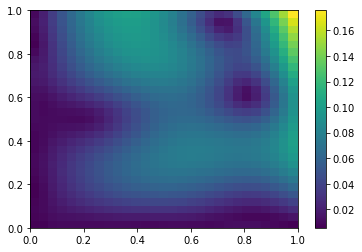

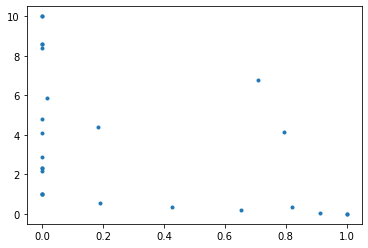

In [3]:
# plot model
n = 30
x = np.linspace(0, 1, n)
xx = np.meshgrid(x, x)
pts = torch.tensor(np.vstack([ele.ravel() for ele in xx]).T).double()

prob = ZDT1(2)

with torch.no_grad():
    pos = model(pts)
    mean = pos.mean
    var = pos.variance

    true = torch.transpose(prob.evaluate_true(pts), 0, 1)

train_y = results['objectives']

fig2, ax2 = plt.subplots()
c = ax2.pcolor(*xx, mean[1].reshape(n, n))
fig2.colorbar(c)

fig2, ax2 = plt.subplots()
c = ax2.pcolor(*xx, torch.sqrt(var[1].reshape(n, n)))
fig2.colorbar(c)

fig, ax = plt.subplots()
ax.plot(train_y[:, 0], train_y[:, 1], '.')
